In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
data = np.random.normal(0, 1, 100) + np.linspace(0, 1, 100)

data[50] = 5

In [3]:
model = SimpleExpSmoothing(data)

model_fit = model.fit(smoothing_level=0.2)

/opt/conda/lib/python3.12/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [6]:
data_pred = model_fit.predict(start=0, end=len(data) - 1)

In [7]:
anomalies = np.where(np.abs(data - data_pred) > 3 * np.std(data - data_pred))[0]

data[anomalies]

array([5.])

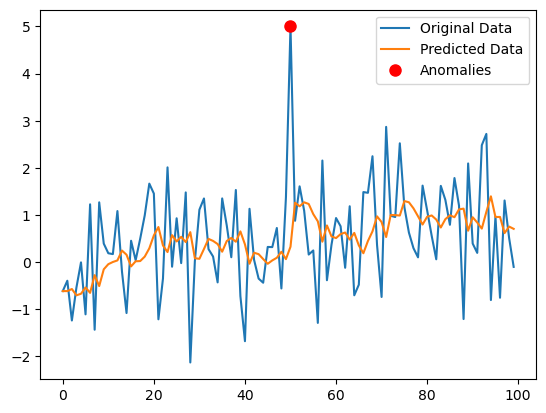

In [8]:
plt.plot(data, label="Original Data")
plt.plot(data_pred, label="Predicted Data")
plt.plot(anomalies, data[anomalies], "ro", markersize=8, label="Anomalies")
plt.legend()
plt.show()